# Import Essential Libraries

In [3]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics
from typing import List


# Data Preparation

In [ ]:
# Import the dataset -  Udemy Courses
rawcoursedata = pd.read_csv('Course_info.csv')
# Create a copy of the Dataset
coursedata_clean = rawcoursedata.copy()
# Remove non-usable columns
coursedata_clean.drop(['course_url', 'instructor_url','id'],axis=1,inplace=True)
#select col in use
data_raw = pd.DataFrame(rawcoursedata[['language','category','subcategory','price']])

In [ ]:
# Calculate the quartiles
Q1 = data_raw.quantile(0.25)
Q3 = data_raw.quantile(0.75)
# Rule to identify outliers
rule = ((data_raw < (Q1 - 1.5 * (Q3 - Q1))) | (data_raw > (Q3 + 1.5 * (Q3 - Q1))))
# Find the rows where ANY column is True
outliers = rule.any(axis = 1)
# Find the row indices correspond to outliers in the dataframe
outlierindices = outliers.index[outliers == True]
# Remove the outliers based on the row indices obtained above
data_raw.drop(axis = 0,               # 0 drops row 1 drops column
                index = outlierindices, # this takes a list as input
                inplace = True)         # not overwritten by default 

# Check the clean data
clean_data = data_raw.copy()
clean_data

## 2. Exploratory Data Analysis / Visualization

### 2.1 Language vs Price

In [2]:
clean_data[["language","price"]].groupby(["language","price"]).sum().sort_values(by = "price", ascending = False).head(10)

NameError: name 'clean_data' is not defined

In [110]:
lang =pd.DataFrame(clean_data[['language']])
top = lang['language'].value_counts().iloc[:5]
top
#lang['count'] = len(clean_data.language.unique())


English       122507
Spanish        16239
Portuguese     15869
Japanese        7006
German          6100
Name: language, dtype: int64

In [111]:
#s=clean_data['category'].groupby(clean_data['language']).value_counts().head(5)


In [119]:
a = clean_data[clean_data['language'].isin(['English','Spanish','Portuguese','Japanese','German'])]
a['language'].count()

167721

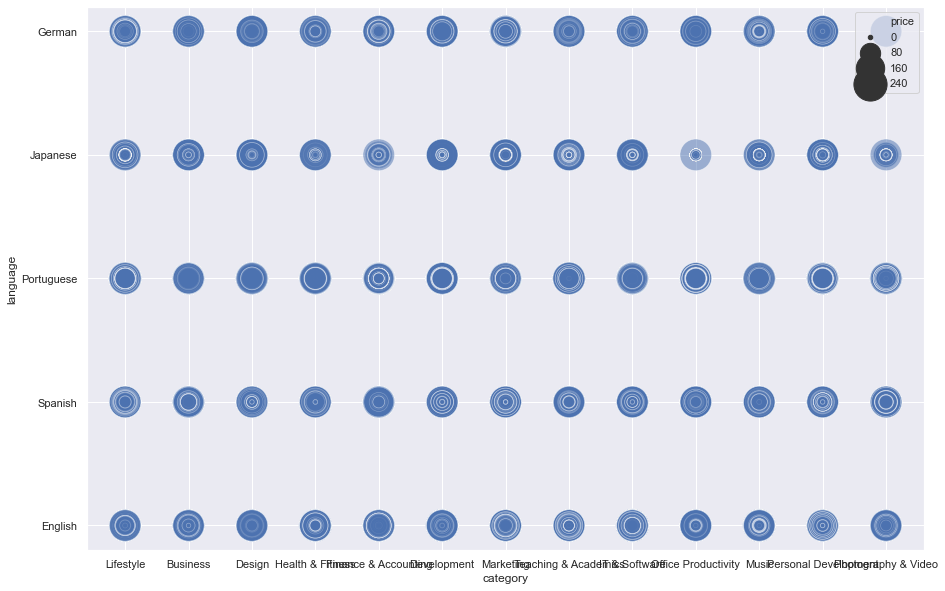

In [121]:
language = a.language
price = a.price
category=a.category
plt.figure(figsize = (15,10))
sb.scatterplot(x=category,y=language, size = price, alpha = 0.5,sizes=(20, 1100))
#plt.show()